<font size=5 >Credit Card Approval Prediction Using Sklearn</font>

In [1]:
# Data Analysis and Manipulation
import numpy as np
import pandas as pd 
import missingno as msno

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Sampling data
from imblearn.over_sampling import SMOTE

#Modelling
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import joblib

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
 


In [2]:
#Import data
app_data = pd.read_csv("../data/application_record.csv", encoding = 'utf-8') 
credit_record = pd.read_csv("../data/credit_record.csv", encoding = 'utf-8')  

In [3]:
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
app_data.info() #Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
credit_record.head()


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## Understanding the Data

### Data Unique Values

In [7]:
print("Number of unique IDs for credit records: {}".format(len(credit_record.ID.unique())))
print("Number of unique clients in application data: {}".format(len(app_data.ID.unique())))


Number of unique IDs for credit records: 45985
Number of unique clients in application data: 438510


In [8]:
print("The avg income of loan applicant: {}".format((app_data['AMT_INCOME_TOTAL']).astype(int).mean()))

The avg income of loan applicant: 187524.28544294127


In [9]:
# checking to see how many records match in two datasets
len(set(credit_record['ID']).intersection(set(app_data['ID']))) 

36457

The number of unique ids in the two datasets is not equal. There are more clients in the credit records than in the application dataset. 

The intersection is 36,457 customers

### Dealing with Missing Values

In [10]:
def missing_values(df):
    """
    missing_values find columns with missing values and other information about the columns.

    df: A Dataframe
    return: A dataframe with missing values information    
    
    """
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 
               1 : 'Missing Values', 
               2 : '% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
        "There are " + str(mz_table.shape[0]) +
          " columns that have missing values.")
    return mz_table

In [11]:
missing_values(app_data)

Your selected dataframe has 18 columns and 438557 Rows.
There are 1 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
OCCUPATION_TYPE,0,134203,30.6,134203,30.6,object


This shows that 30.6% of our clients didn't indicate their occupation, we can't remove the rows with missing values because the  30% is beyond the standard threshold of 12-14%, so we will filled the missing values with "Unspecified"

We will deal with the missing values later

# Feature Engineering

In [12]:
# getting the moneth users' account were opened.
start_month = pd.DataFrame(credit_record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
start_month = start_month.rename(columns = {'MONTHS_BALANCE':'start_month'}) 

In [13]:
new_df = pd.merge(app_data, start_month, how = "left", on = "ID")
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,start_month
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0


In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438557 entries, 0 to 438556
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

### Categorizing The Default Status

In [15]:
category = ['0', '1', '2', '3', '4', '5']
loan_user = credit_record[credit_record['STATUS'] != "X"]
loan_user['default_status'] = loan_user['STATUS'].apply(lambda x: "default" if x in category else 'non-default')
loan_user.head()
print(loan_user['default_status'].value_counts())
loan_user['default_status'].value_counts(normalize=True)

non-default    442031
default        397314
Name: default_status, dtype: int64


non-default    0.526638
default        0.473362
Name: default_status, dtype: float64

I will choose users who are past due by 60 days as bad debtors. They are marked as '1', others are '0'.

In [16]:
#Classifiying them into 0 and 1
category = ['2', '3', '4', '5']

credit_record['debt_class'] = credit_record['STATUS'].apply(lambda x: "yes" if x in category else 'no')
credit_record.head()
id_count = credit_record.groupby('ID').count()

In [17]:
credit_record.head()
# cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes' 
# cpunt['dep_value'][cpunt['dep_value'] == 0]='No'

,ID,MONTHS_BALANCE,STATUS,debt_class
0,5001711,0,X,no
1,5001711,-1,0,no
2,5001711,-2,0,no
3,5001711,-3,0,no
4,5001712,0,C,no


In [18]:
credit_record_values = credit_record[['debt_class']]
new_df2 = pd.merge(new_df, credit_record, how = 'inner', on = 'ID')
new_df2.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,start_month,MONTHS_BALANCE,STATUS,debt_class
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,-15.0,0,C,no
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,-15.0,-1,C,no
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,-15.0,-2,C,no
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,-15.0,-3,C,no
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,-15.0,-4,C,no


In [19]:
new_df2['target'] = new_df2['debt_class']
new_df2.loc[new_df2['target'] == 'yes','target'] = 1
new_df2.loc[new_df2['target'] == 'no','target'] = 0
print(credit_record['debt_class'].value_counts())
credit_record['debt_class'].value_counts(normalize=True)

no     1045471
yes       3104
Name: debt_class, dtype: int64


no     0.99704
yes    0.00296
Name: debt_class, dtype: float64

## Weight of Evidence and Information Value

The weight of evidence tells the predictive power of a single feature concerning its independent feature. If any of the categories/bins of a feature has a large proportion of events compared to the proportion of non-events, we will get a high value of WoE which in turn says that that class of the feature separates the events from non-events. [source](https://www.analyticsvidhya.com/blog/2021/06/understand-weight-of-evidence-and-information-value/)

Using `calc_iv` function defined [here](https://www.kaggle.com/puremath86/iv-woe-starter-for-python) to calculate Information Value and Weight of evidence Value. The weight of evidence tells us the predictive power of an independent variable in relation to the dependent variable. 


Rename columns to be more readable 

In [20]:
new_df2.rename(columns = {
    'CODE_GENDER':'gender',
    'FLAG_OWN_CAR':'car',
    'FLAG_OWN_REALTY':'property',
    'CNT_CHILDREN':'children',
    'AMT_INCOME_TOTAL':'income',
    'NAME_EDUCATION_TYPE':'education',
    'NAME_FAMILY_STATUS':'marital_status',
    'NAME_HOUSING_TYPE':'housing',
    'FLAG_EMAIL':'email',
    'NAME_INCOME_TYPE':'income_category',
    'FLAG_WORK_PHONE':'work_phone',
    'FLAG_PHONE':'phone',
    'CNT_FAM_MEMBERS':'family_size',
    'OCCUPATION_TYPE':'occupation'
    },inplace=True)


In [23]:
#Check for missing value
# plt_missing_3 = msno.matrix(new_df2)
# plt_missing_3.set_title("Missing Data",fontsize=22)


In [24]:
# replace missing values in occupation to 'unspecified'
new_df2['occupation'].fillna('unspecified', inplace=True)
new_df2.isna().any().any()
new_df2.head()

,ID,gender,car,property,children,income,income_category,education,marital_status,housing,...,work_phone,phone,email,occupation,family_size,start_month,MONTHS_BALANCE,STATUS,debt_class,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,unspecified,2.0,-15.0,0,C,no,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,unspecified,2.0,-15.0,-1,C,no,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,unspecified,2.0,-15.0,-2,C,no,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,unspecified,2.0,-15.0,-3,C,no,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,unspecified,2.0,-15.0,-4,C,no,0


In [25]:
iv_data=pd.DataFrame(new_df2.columns,columns=['variable'])
iv_data['IV']=None
name_list = ['FLAG_MOBIL','start_month','debt_class','target','ID']
for i in name_list:
    iv_data.drop(iv_data[iv_data['variable'] == i].index, inplace=True)

In [26]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    """
    calc_iv calculates the information value.
    
    Params:
    df: A Dataframe
    feature: The independent variable
    target: the dependent variable
    
    return: 
    iv: The information value
    data: a dataframe with information with more information on WoE and IV of the variable 
    
    """
    lst = []
    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()
    print('This variable\'s IV is:',iv)
    print(df[feature].value_counts())
    return iv, data

In [27]:
def convert_dummy(df, feature, rank=0):
    """
    convert_dummy converts a categorical variable in a dataframe to dummy variables.
    
    Params:
    df: A Dataframe
    feature: The variable to convert
    
    return: 
    df: a dataframe with dummy variable    
    """
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [28]:
def get_category(df, col, binsnum, labels, qcut = False):
    if qcut:
        localdf = pd.qcut(df[col], q = binsnum, labels = labels) # quantile cut
    else:
        localdf = pd.cut(df[col], bins = binsnum, labels = labels) # equal-length cut
        
    localdf = pd.DataFrame(localdf)
    name = 'gp' + '_' + col
    localdf[name] = localdf[col]
    df = df.join(localdf[name])
    df[name] = df[name].astype(object)
    return df

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Calculate IV for selected variables

In [30]:
new_df2.head()


,ID,gender,car,property,children,income,income_category,education,marital_status,housing,...,work_phone,phone,email,occupation,family_size,start_month,MONTHS_BALANCE,STATUS,debt_class,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,unspecified,2.0,-15.0,0,C,no,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,unspecified,2.0,-15.0,-1,C,no,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,unspecified,2.0,-15.0,-2,C,no,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,unspecified,2.0,-15.0,-3,C,no,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,unspecified,2.0,-15.0,-4,C,no,0


In [32]:
# new_df2['target'].value_counts()
# fig, ax = plt.subplots(figsize=(10, 10))
# sns.heatmap(new_df2.corr())


#### Gender

In [33]:
new_df2['gender'] = new_df2['gender'].replace(['F','M'],[0,1])
iv, data = calc_iv(new_df2,'gender','target')
iv_data.loc[iv_data['variable'] == 'gender','IV'] = iv
data.head()

This variable's IV is: 0.03679191095260092
0    518851
1    258864
Name: gender, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gender,0,518851,517226,1625,0.667148,0.003132,0.667486,0.574611,0.149825,0.013915
1,gender,1,258864,257661,1203,0.332852,0.004647,0.332514,0.425389,-0.246321,0.022877


#### Car ownership status

In [34]:
new_df2['car'] = new_df2['car'].replace(['N','Y'], [0,1])
iv, data = calc_iv(new_df2,'car','target')
iv_data.loc[iv_data['variable'] =='car','IV'] = iv
data.head()

This variable's IV is: 0.0002381548065452438
0    473355
1    304360
Name: car, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,car,0,473355,471655,1700,0.608648,0.003591,0.608676,0.601132,0.012472,0.000094
1,car,1,304360,303232,1128,0.391352,0.003706,0.391324,0.398868,-0.019095,0.000144


#### Property ownership status

In [35]:
new_df2['property'] = new_df2['property'].replace(['N','Y'],[0,1])
iv, data = calc_iv(new_df2,'property','target')
iv_data.loc[iv_data['variable']=='property','IV'] = iv
data.head()

This variable's IV is: 0.00041314523412768107
1    512948
0    264767
Name: property, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,property,0,264767,263777,990,0.340442,0.003739,0.340407,0.350071,-0.027993,0.000271
1,property,1,512948,511110,1838,0.659558,0.003583,0.659593,0.649929,0.014759,0.000143


#### Phone ownership status

In [36]:
new_df2['phone'] = new_df2['phone'].astype(str)
new_df2.drop(new_df2[new_df2['phone'] == 'nan' ].index, inplace=True)
iv, data = calc_iv(new_df2,'phone','target')
iv_data.loc[iv_data['variable'] == 'phone', 'IV'] = iv
data.head()

This variable's IV is: 0.01372456561875916
0    543650
1    234065
Name: phone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,phone,0,543650,541828,1822,0.699035,0.003351,0.699235,0.644272,0.081866,0.004500
1,phone,1,234065,233059,1006,0.300965,0.004298,0.300765,0.355728,-0.167838,0.009225


#### Email

In [37]:
print(new_df2['email'].value_counts(normalize=True,sort=False))
new_df2['email'] = new_df2['email'].astype(str)
iv, data = calc_iv(new_df2, 'email', 'target')
iv_data.loc[iv_data['variable'] == 'email', 'IV'] = iv
data.head()

0    0.908325
1    0.091675
Name: email, dtype: float64
This variable's IV is: 0.0027804559765888253
0    706418
1     71297
Name: email, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,email,0,706418,703808,2610,0.908325,0.003695,0.908272,0.922914,-0.015992,0.000234
1,email,1,71297,71079,218,0.091675,0.003058,0.091728,0.077086,0.173905,0.002546


#### Having a Work Phone or not

In [38]:
new_df2['work_phone']=new_df2['work_phone'].astype(str)
iv, data = calc_iv(new_df2,'work_phone', 'target')
new_df2.drop(new_df2[new_df2['work_phone'] == 'nan' ].index, inplace=True)
iv_data.loc[iv_data['variable'] == 'work_phone','IV'] = iv
data.head()

This variable's IV is: 0.014156449393518485
0    597427
1    180288
Name: work_phone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,work_phone,0,597427,595401,2026,0.768182,0.003391,0.768371,0.716407,0.070024,0.003639
1,work_phone,1,180288,179486,802,0.231818,0.004448,0.231629,0.283593,-0.202404,0.010518


### Continuous Variables

In [39]:
new_df2.loc[new_df2['children'] >= 2,'children']='2More'
print(new_df2['children'].value_counts(sort=False))

0        540639
1        155638
2More     81438
Name: children, dtype: int64


In [40]:
iv, data = calc_iv(new_df2,'children','target')
iv_data.loc[iv_data['variable'] == 'children','IV'] = iv
data.head()

This variable's IV is: 0.015040070834382642
0        540639
1        155638
2More     81438
Name: children, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,children,0,540639,538727,1912,0.695163,0.003537,0.695233,0.676096,0.027912,0.000534
1,children,1,155638,154951,687,0.200122,0.004414,0.199966,0.242928,-0.194618,0.008361
2,children,2More,81438,81209,229,0.104714,0.002812,0.104801,0.080976,0.257912,0.006145


In [41]:
new_df2 = convert_dummy(new_df2,'children')

#### Annual Income
bins the data based on sample quantiles

(2.544, 18.18]      472222
(18.18, 33.66]      246863
(33.66, 49.14]       47802
(49.14, 64.62]        5746
(64.62, 80.1]         3512
(80.1, 95.58]         1209
(95.58, 111.06]         26
(111.06, 126.54]        83
(126.54, 142.02]       102
(142.02, 157.5]        150
Name: income, dtype: int64


<AxesSubplot:ylabel='Frequency'>

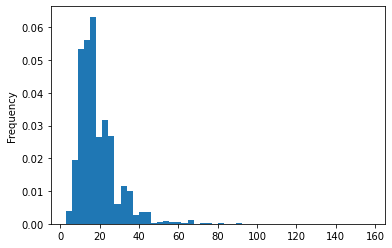

In [42]:
new_df2['income']=new_df2['income'].astype(object)
new_df2['income'] = new_df2['income']/10000 
print(new_df2['income'].value_counts(bins=10,sort=False))
new_df2['income'].plot(kind='hist',bins=50,density=True)

In [43]:
new_df2 = get_category(new_df2, 'income', 3, ["low","medium", "high"], qcut = True)
iv, data = calc_iv(new_df2, 'gp_income', 'target')
iv_data.loc[iv_data['variable'] == 'income', 'IV'] = iv
data.head()

This variable's IV is: 0.0028746243188995085
low       301876
high      246790
medium    229049
Name: gp_income, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_income,high,246790,245889,901,0.317327,0.003651,0.317322,0.318600,-0.004017,0.000005
1,gp_income,low,301876,300719,1157,0.388158,0.003833,0.388081,0.409123,-0.052802,0.001111
2,gp_income,medium,229049,228279,770,0.294515,0.003362,0.294597,0.272277,0.078786,0.001758


In [44]:
new_df2 = convert_dummy(new_df2,'gp_income')

#### Age
Bucketing Continuous Variables

(19.951, 24.8]    0.012404
(24.8, 29.6]      0.103150
(29.6, 34.4]      0.139630
(34.4, 39.2]      0.147854
(39.2, 44.0]      0.148778
(44.0, 48.8]      0.096960
(48.8, 53.6]      0.115922
(53.6, 58.4]      0.108177
(58.4, 63.2]      0.091882
(63.2, 68.0]      0.035244
Name: Age, dtype: float64


<AxesSubplot:ylabel='Frequency'>

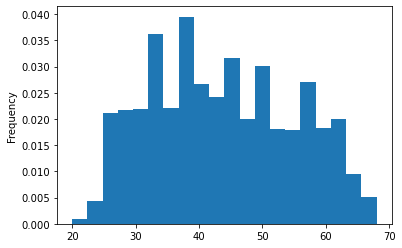

In [45]:
new_df2['Age']=-(new_df2['DAYS_BIRTH'])//365	
print(new_df2['Age'].value_counts(bins=10,normalize=True,sort=False))
new_df2['Age'].plot(kind='hist',bins=20,density=True)

In [46]:
new_df2 = get_category(new_df2,'Age',5, ["lowest","low","medium","high","highest"])
iv, data = calc_iv(new_df2,'gp_Age','target')
iv_data.loc[iv_data['variable'] == 'DAYS_BIRTH', 'IV'] = iv
data.head()

This variable's IV is: 0.01943682732646494
low        223580
medium     191114
high       174285
highest     98868
lowest      89868
Name: gp_Age, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_Age,high,174285,173527,758,0.224099,0.004349,0.223938,0.268034,-0.179742,0.007926
1,gp_Age,highest,98868,98478,390,0.127126,0.003945,0.127087,0.137907,-0.081706,0.000884
2,gp_Age,low,223580,222893,687,0.287483,0.003073,0.287646,0.242928,0.168965,0.007556
3,gp_Age,lowest,89868,89509,359,0.115554,0.003995,0.115512,0.126945,-0.094375,0.001079
4,gp_Age,medium,191114,190480,634,0.245738,0.003317,0.245816,0.224187,0.092106,0.001992


In [47]:
new_df2 = convert_dummy(new_df2,'gp_Age')

In [48]:
new_df2.columns

Index(['ID', 'gender', 'car', 'property', 'income', 'income_category',
       'education', 'marital_status', 'housing', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occupation',
       'family_size', 'start_month', 'MONTHS_BALANCE', 'STATUS', 'debt_class',
       'target', 'children_1', 'children_2More', 'gp_income_high',
       'gp_income_medium', 'Age', 'gp_Age_high', 'gp_Age_highest',
       'gp_Age_lowest', 'gp_Age_medium'],
      dtype='object')

#### Working Years
+ Equal-length Bucketing

<AxesSubplot:ylabel='Frequency'>

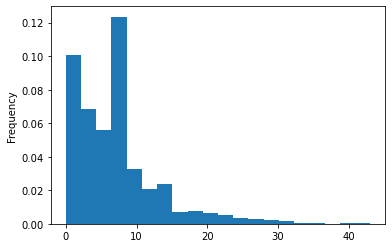

In [49]:
new_df2['work_yrs'] =- (new_df2['DAYS_EMPLOYED'])//365	
new_df2[new_df2['work_yrs']<0] = np.nan # replace by na
new_df2['DAYS_EMPLOYED']
new_df2['work_yrs'].fillna(new_df2['work_yrs'].mean(),inplace = True) #replace na by mean
new_df2['work_yrs'].plot(kind = 'hist', bins = 20, density = True)

In [50]:
new_df2 = get_category(new_df2,'work_yrs',5, ["lowest","low","medium","high","highest"])
iv, data = calc_iv(new_df2,'gp_work_yrs','target')
iv_data.loc[iv_data['variable'] == 'DAYS_EMPLOYED', 'IV'] = iv
data.head()

This variable's IV is: 0.010090710377119175
lowest     582376
low        141513
medium      37968
high        12798
highest      3060
Name: gp_work_yrs, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_work_yrs,high,12798,12770,28,0.016456,0.002188,0.016469,0.012158,0.303468,1.308130e-03
1,gp_work_yrs,highest,3060,3051,9,0.003935,0.002941,0.003935,0.003908,0.006818,1.822942e-07
2,gp_work_yrs,low,141513,141152,361,0.181960,0.002551,0.182035,0.156752,0.149533,3.780604e-03
3,gp_work_yrs,lowest,582376,452586,1818,0.748830,0.003122,0.748709,0.789405,-0.052929,2.154008e-03
4,gp_work_yrs,medium,37968,37881,87,0.048820,0.002291,0.048853,0.037777,0.257115,2.847786e-03


In [51]:
new_df2 = convert_dummy(new_df2,'gp_work_yrs')

#### Famliy Size

In [52]:
new_df2['family_size'].value_counts(sort=False)

2.0     338070
1.0     103223
5.0       8869
3.0     131805
4.0      66144
6.0       1196
15.0       111
7.0        273
20.0         6
9.0         46
Name: family_size, dtype: int64

In [56]:
missing_values(new_df2)

Your selected dataframe has 36 columns and 649743 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [57]:
new_df2 = new_df2.dropna()

In [58]:
missing_zero_values_table(new_df2)

Your selected dataframe has 36 columns and 649743 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [59]:
new_df2['family_size'] = new_df2['family_size'].astype(int)
new_df2['family_size'] = new_df2['family_size']
new_df2['family_sizegp'] = new_df2['family_size'].astype(object)
new_df2.loc[new_df2['family_sizegp'] >= 3,'family_sizegp'] = '3more'
iv, data = calc_iv(new_df2,'family_sizegp','target')
iv_data.loc[iv_data['variable'] == 'family_size','IV'] = iv
data.head()

This variable's IV is: 0.0019887589151372786
2        338070
3more    208450
1        103223
Name: family_sizegp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,family_sizegp,1,103223,102869,354,0.158867,0.003429,0.158886,0.153713,0.033101,0.000171
1,family_sizegp,2,338070,336908,1162,0.520313,0.003437,0.520369,0.504559,0.030854,0.000488
2,family_sizegp,3more,208450,207663,787,0.320819,0.003775,0.320745,0.341728,-0.063370,0.001330


In [60]:
new_df2 = convert_dummy(new_df2,'family_sizegp')

### Categorical Features

#### Income Type

In [61]:
print(new_df2['income_category'].value_counts(sort=False))
print(new_df2['income_category'].value_counts(normalize=True,sort=False))

Working                 400164
Commercial associate    183385
State servant            65437
Student                    337
Pensioner                  420
Name: income_category, dtype: int64
Working                 0.615880
Commercial associate    0.282242
State servant           0.100712
Student                 0.000519
Pensioner               0.000646
Name: income_category, dtype: float64


In [62]:
new_df2.loc[new_df2['income_category'] == 'Pensioner','income_category'] = 'Govt Paid & Students'
new_df2.loc[new_df2['income_category'] == 'Student','income_category'] = 'Govt Paid & Students'
new_df2.loc[new_df2['income_category'] == 'State servant','income_category'] = 'Govt Paid & Students'

iv, data = calc_iv(new_df2,'income_category', 'target')
iv_data.loc[iv_data['variable'] == 'income_category','IV'] = iv
data.head()

This variable's IV is: 0.05258310656556628
Working                 400164
Commercial associate    183385
Govt Paid & Students     66194
Name: income_category, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,income_category,Commercial associate,183385,182488,897,0.282242,0.004891,0.281861,0.389492,-0.323430,0.034811
1,income_category,Govt Paid & Students,66194,65984,210,0.101877,0.003172,0.101915,0.091185,0.111247,0.001194
2,income_category,Working,400164,398968,1196,0.615880,0.002989,0.616224,0.519323,0.171085,0.016578


In [63]:
new_df2 = convert_dummy(new_df2,'income_category')

#### Occupation Type

In [64]:
general_work = ['Cleaning staff', 'Cooking staff', 'Drivers', 'Laborers', 'Low-skill Laborers',  'Security staff', 'Waiters/barmen staff']
office_work = ['Accountants', 'Core staff', 'HR staff', 'Medicine staff', 'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries']
execs_tech = ['Managers', 'High skill tech staff', 'IT staff'] 

def get_work(row):
    if any(n in row['occupation'] for n in general_work) == True:
        return 'general_work'
    elif any(n in row['occupation'] for n in office_work) == True:
        return 'office_work'
    elif any(n in row['occupation'] for n in execs_tech) == True:
        return 'executives_techwork'

In [65]:
#new_df2['occupation'] = new_df2['occupation'].apply(get_work)

In [66]:
new_df2.loc[(new_df2['occupation']=='Cleaning staff') | (new_df2['occupation']=='Cooking staff') | (new_df2['occupation']=='Drivers') | (new_df2['occupation']=='Laborers') | (new_df2['occupation']=='Low-skill Laborers') | (new_df2['occupation']=='Security staff') | (new_df2['occupation']=='Waiters/barmen staff'),'occupation']= 'general_work'
new_df2.loc[(new_df2['occupation']=='Accountants') | (new_df2['occupation']=='Core staff') | (new_df2['occupation']=='HR staff') | (new_df2['occupation']=='Medicine staff') | (new_df2['occupation']=='Private service staff') | (new_df2['occupation']=='Realty agents') | (new_df2['occupation']=='Sales staff') | (new_df2['occupation']=='Secretaries'),'occupation']='office_work'
new_df2.loc[(new_df2['occupation']=='Managers') | (new_df2['occupation']=='High skill tech staff') | (new_df2['occupation']=='IT staff'),'occupation']='execs_techwork'
print(new_df2['occupation'].value_counts())
iv, data=calc_iv(new_df2,'occupation','target')
iv_data.loc[iv_data['variable']=='occupation','IV']=iv
data.head()  

general_work      222645
office_work       214197
unspecified       112076
execs_techwork    100825
Name: occupation, dtype: int64
This variable's IV is: 0.04658777845258981
general_work      222645
office_work       214197
unspecified       112076
execs_techwork    100825
Name: occupation, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,occupation,execs_techwork,100825,100391,434,0.155177,0.004304,0.155058,0.188450,-0.195030,0.006512
1,occupation,general_work,222645,221691,954,0.342666,0.004285,0.342412,0.414242,-0.190437,0.013679
2,occupation,office_work,214197,213623,574,0.329664,0.002680,0.329950,0.249240,0.280525,0.022641
3,occupation,unspecified,112076,111735,341,0.172493,0.003043,0.172580,0.148068,0.153189,0.003755


In [67]:
new_df2 = convert_dummy(new_df2, 'occupation')

#### House Type

In [68]:
iv, data=calc_iv(new_df2,'housing','target')
iv_data.loc[iv_data['variable']=='housing','IV']=iv
data.head()

This variable's IV is: 0.015611463207027408
House / apartment      574114
With parents            35632
Municipal apartment     21131
Rented apartment        10263
Office apartment         4998
Co-op apartment          3605
Name: housing, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,housing,Co-op apartment,3605,3575,30,0.005548,0.008322,0.005522,0.013026,-0.858290,0.006441
1,housing,House / apartment,574114,572122,1992,0.883602,0.003470,0.883668,0.864959,0.021400,0.000400
2,housing,Municipal apartment,21131,21030,101,0.032522,0.004780,0.032482,0.043856,-0.300229,0.003415
3,housing,Office apartment,4998,4968,30,0.007692,0.006002,0.007673,0.013026,-0.529238,0.002833
4,housing,Rented apartment,10263,10218,45,0.015795,0.004385,0.015782,0.019540,-0.213570,0.000803


In [69]:
new_df2 = convert_dummy(new_df2,'housing')

#### Education

In [70]:
new_df2.loc[new_df2['education']=='Academic degree','education']='Higher education'
iv, data=calc_iv(new_df2,'education','target')
iv_data.loc[iv_data['variable']=='education','IV']=iv
data.head()

This variable's IV is: 0.04009105095797014
Secondary / secondary special    423061
Higher education                 192377
Incomplete higher                 29118
Lower secondary                    5187
Name: education, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,education,Higher education,192377,191548,829,0.296082,0.004309,0.295854,0.359965,-0.196140,0.012575
1,education,Incomplete higher,29118,29007,111,0.044815,0.003812,0.044803,0.048198,-0.073051,0.000248
2,education,Lower secondary,5187,5134,53,0.007983,0.010218,0.007930,0.023013,-1.065465,0.016071
3,education,Secondary / secondary special,423061,421751,1310,0.651121,0.003096,0.651413,0.568823,0.135574,0.011197


In [71]:
new_df2 = convert_dummy(new_df2,'education')

####  Marriage Status

In [72]:
new_df2['marital_status'].value_counts(normalize=True,sort=False)

Civil marriage          0.081520
Married                 0.714969
Single / not married    0.122842
Separated               0.058052
Widow                   0.022617
Name: marital_status, dtype: float64

In [73]:
iv, data=calc_iv(new_df2,'marital_status','target')
iv_data.loc[iv_data['variable']=='marital_status','IV']=iv
data.head()

This variable's IV is: 0.05194190938845083
Married                 464546
Single / not married     79816
Civil marriage           52967
Separated                37719
Widow                    14695
Name: marital_status, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,marital_status,Civil marriage,52967,52865,102,0.081520,0.001926,0.081652,0.044290,0.611710,0.022855
1,marital_status,Married,464546,462917,1629,0.714969,0.003507,0.714996,0.707338,0.010768,0.000082
2,marital_status,Separated,37719,37626,93,0.058052,0.002466,0.058115,0.040382,0.364038,0.006455
3,marital_status,Single / not married,79816,79410,406,0.122842,0.005087,0.122652,0.176292,-0.362787,0.019460
4,marital_status,Widow,14695,14622,73,0.022617,0.004968,0.022584,0.031698,-0.338990,0.003089


In [74]:
new_data = convert_dummy(new_df2, 'marital_status')

## Weight of Evidence

Relationship between IV value and predictive power

| IV| Ability to predict | 
|:------|:------:| 
| <0.02 | Almost no predictive power | 
|0.02~0.1 |weak predictive power|
|0.1~0.3|Moderate predictive power|
|0.3~0.5|Strong predictive power|
|>0.5|Predictive power is too strong, need to check variables| 

In [75]:
iv_data=iv_data.sort_values(by='IV',ascending=False)
iv_data.loc[iv_data['variable']=='DAYS_BIRTH','variable']='agegp'
#iv_data.loc[iv_data['variable']=='DAYS_EMPLOYED','variable']='work_yrsgp'
iv_data.loc[iv_data['variable']=='inc','variable']='incomegp'
iv_data

,variable,IV
6,income_category,0.052583
8,marital_status,0.051942
16,occupation,0.046588
7,education,0.040091
1,gender,0.036792
10,agegp,0.019437
9,housing,0.015611
4,children,0.01504
13,work_phone,0.014156
14,phone,0.013725


In [76]:
new_df2['target'].value_counts()

0    647440
1      2303
Name: target, dtype: int64

# Three Machine Learning Algorithms

+ Split Dataset

In [77]:
new_df2.columns

Index(['ID', 'gender', 'car', 'property', 'income', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'family_size', 'start_month', 'MONTHS_BALANCE', 'STATUS', 'debt_class',
       'target', 'children_1', 'children_2More', 'gp_income_high',
       'gp_income_medium', 'Age', 'gp_Age_high', 'gp_Age_highest',
       'gp_Age_lowest', 'gp_Age_medium', 'work_yrs', 'gp_work_yrs_high',
       'gp_work_yrs_highest', 'gp_work_yrs_low', 'gp_work_yrs_medium',
       'family_sizegp_1', 'family_sizegp_3more',
       'income_category_Commercial associate',
       'income_category_Govt Paid & Students', 'occupation_execs_techwork',
       'occupation_office_work', 'occupation_unspecified',
       'housing_Co-op apartment', 'housing_Municipal apartment',
       'housing_Office apartment', 'housing_Rented apartment',
       'housing_With parents', 'education_Higher education',
       'education_Incomplete higher', 'education_Lower secondary'],
      dtype='object

In [78]:
y = new_df2['target']
#X = new_df2.loc[:, new_df2.columns != ['ID', 'target']]
X = new_df2[new_df2.columns.difference(['ID', 'target', 'debt_class', 'STATUS'])]

#X = new_df2.drop(, axis=1)
# X = new_data[['Gender','Reality','ChldNo_1', 'ChldNo_2More','wkphone',
#               'gp_Age_high', 'gp_Age_highest', 'gp_Age_low',
#        'gp_Age_lowest','gp_worktm_high', 'gp_worktm_highest',
#        'gp_worktm_low', 'gp_worktm_medium','occyp_hightecwk', 
#               'occyp_officewk','famsizegp_1', 'famsizegp_3more',
#        'houtp_Co-op apartment', 'houtp_Municipal apartment',
#        'houtp_Office apartment', 'houtp_Rented apartment',
#        'houtp_With parents','edutp_Higher education',
#        'edutp_Incomplete higher', 'edutp_Lower secondary','famtp_Civil marriage',
#        'famtp_Separated','famtp_Single / not married','famtp_Widow']]

In [79]:
X

,Age,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,MONTHS_BALANCE,car,children_1,children_2More,education_Higher education,education_Incomplete higher,...,income_category_Commercial associate,income_category_Govt Paid & Students,occupation_execs_techwork,occupation_office_work,occupation_unspecified,phone,property,start_month,work_phone,work_yrs
0,32.0,-12005.0,-4542.0,1.0,0.0,1.0,0.0,0.0,1,0,...,0,0,0,0,1,0,1.0,-15.0,1,12.0
1,32.0,-12005.0,-4542.0,1.0,-1.0,1.0,0.0,0.0,1,0,...,0,0,0,0,1,0,1.0,-15.0,1,12.0
2,32.0,-12005.0,-4542.0,1.0,-2.0,1.0,0.0,0.0,1,0,...,0,0,0,0,1,0,1.0,-15.0,1,12.0
3,32.0,-12005.0,-4542.0,1.0,-3.0,1.0,0.0,0.0,1,0,...,0,0,0,0,1,0,1.0,-15.0,1,12.0
4,32.0,-12005.0,-4542.0,1.0,-4.0,1.0,0.0,0.0,1,0,...,0,0,0,0,1,0,1.0,-15.0,1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,25.0,-9188.0,-1193.0,1.0,-9.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1.0,-13.0,0,3.0
777711,25.0,-9188.0,-1193.0,1.0,-10.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1.0,-13.0,0,3.0
777712,25.0,-9188.0,-1193.0,1.0,-11.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1.0,-13.0,0,3.0
777713,25.0,-9188.0,-1193.0,1.0,-12.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1.0,-13.0,0,3.0


+ Using Synthetic Minority Over-Sampling Technique(`SMOTE`) to overcome sample imbalance problem.

In [80]:
y = y.astype('int')
X_balance,y_balance = SMOTE().fit_resample(X,y)
X_balance = pd.DataFrame(X_balance, columns = X.columns)

+ After over sampling, the number between 1 and 0 is balanced. It can be seen from the confusion matrix.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_balance,y_balance, 
                                                    stratify=y_balance, test_size=0.3,
                                                    random_state = 102)

In [82]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649743 entries, 0 to 777714
Data columns (total 50 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    649743 non-null  float64
 1   gender                                649743 non-null  float64
 2   car                                   649743 non-null  float64
 3   property                              649743 non-null  float64
 4   income                                649743 non-null  object 
 5   DAYS_BIRTH                            649743 non-null  float64
 6   DAYS_EMPLOYED                         649743 non-null  float64
 7   FLAG_MOBIL                            649743 non-null  float64
 8   work_phone                            649743 non-null  object 
 9   phone                                 649743 non-null  object 
 10  email                                 649743 non-null  object 
 11  

## 1) Logistic Regression   

Accuracy Score is 0.609
        0       1
0  100601   93631
1   58258  135974
[[0.51794246 0.48205754]
 [0.29994028 0.70005972]]


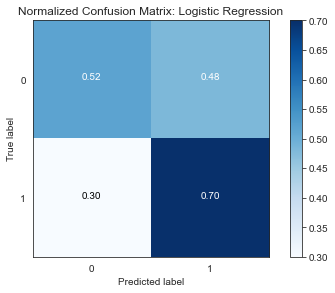

In [83]:
model = LogisticRegression(C=0.8,
                           random_state=23,
                           solver='lbfgs')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression')


In [84]:
LR_score = accuracy_score(y_test, y_predict)
LR_percent = LR_score*100
print(f'The model accuracy is {LR_percent}%.')

The model accuracy is 60.90010914782322%.


## Decision Tree

Accuracy Score is 0.95052
        0       1
0  179233   14999
1    4222  190010
[[0.92277792 0.07722208]
 [0.02173689 0.97826311]]


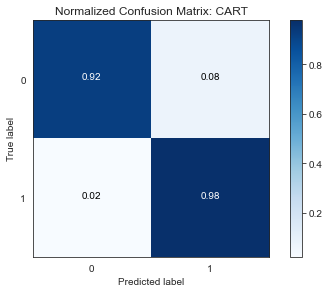

In [85]:
model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1124)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: CART')

In [86]:
DT_score = accuracy_score(y_test, y_predict)
DT_percent = DT_score*100
print(f'The model accuracy is {DT_percent}%.')

The model accuracy is 95.05205115531942%.


## Random Forest   

Accuracy Score is 0.97691
        0       1
0  190299    3933
1    5036  189196
[[0.97975102 0.02024898]
 [0.02592776 0.97407224]]


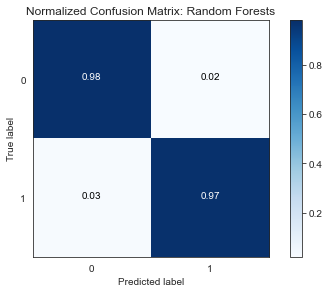

In [87]:
model = RandomForestClassifier(n_estimators=250,
                              max_depth=13,
                              min_samples_leaf=16
                              )

model.fit(X_train, y_train)


y_predict = model.predict(X_test)


print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Random Forests')

In [88]:
RF_score = accuracy_score(y_test, y_predict)
RF_percent = RF_score*100
print(f'The model accuracy is {RF_percent}%.')

The model accuracy is 97.69116314510482%.


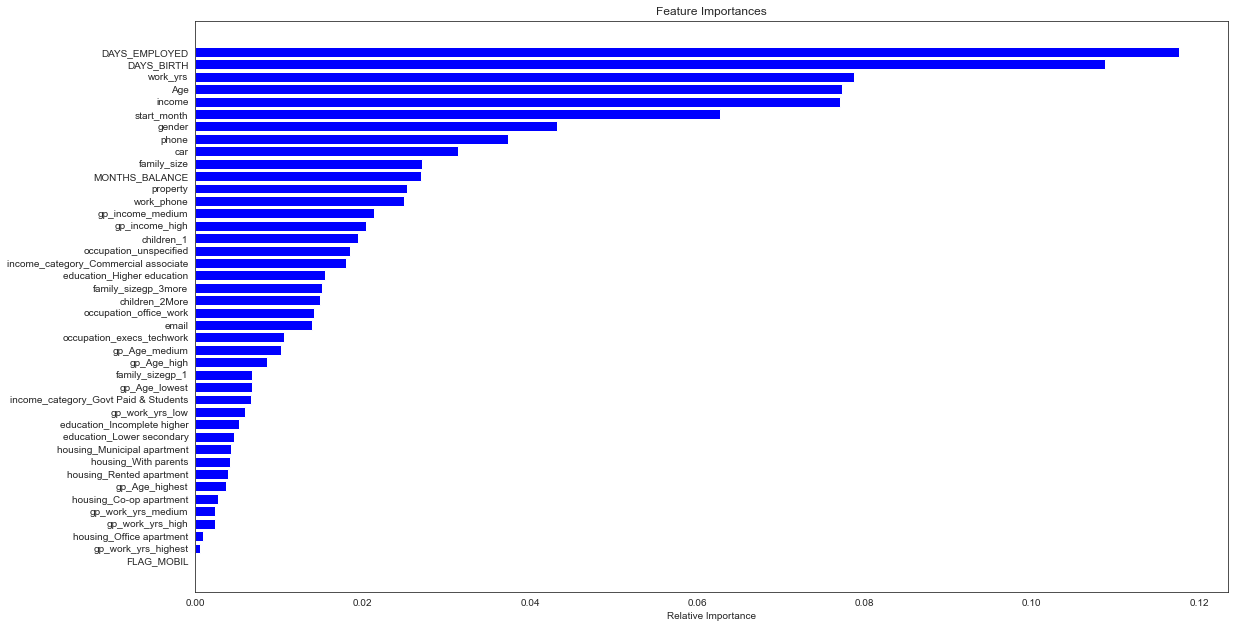

In [89]:
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [90]:
# Persist the model
joblib.dump(model, '../model/model.pkl')
# model = joblib.load('model.pkl')

['../model/model.pkl']

In [91]:
# Persist model columns
model_columns = list(X_train.columns)
joblib.dumps(model_columns, '../model/model_columns.pkl')

AttributeError: module 'joblib' has no attribute 'dumps'